<a href="https://colab.research.google.com/github/bok-h22/semi-project/blob/master/%ED%9A%8C%EA%B7%80%EB%94%A5%EB%9F%AC%EB%8B%9D_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings 
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
final_numeric_col_df = pd.read_csv('/content/훈련용 데이터.csv', encoding='cp949')
final_numeric_col_df.drop('Unnamed: 0',axis=1,inplace=True)
final_numeric_col_df.columns

Index(['30~59세 인구', '평균 버스 이용량 (명)', '수요', '인프라', '경제', '비만도 분포', '1~2인가구',
       '3인 가구 이상', '가구유형', 'target', 'value', '매장명'],
      dtype='object')

In [ ]:
final_numeric_col_df.drop(['매장명','target'],axis=1,inplace=True)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    final_numeric_col_df.drop("value", axis=1),
    final_numeric_col_df['value'],
    random_state=42
)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(16, activation='elu', name='a'),
    Dense(8, activation='elu', name='b'),
    Dense(1, activation='linear', name='c')
])

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['acc']
)

history=model.fit(
    X_train,
    y_train,
    epochs=120,
    validation_split=0.3,
    batch_size=8
)

print(history.history)

Epoch 1/120
12/12 [==============================] - 1s 19ms/step - loss: 3.4135 - acc: 0.0105 - val_loss: 2.9799 - val_acc: 0.0000e+00
Epoch 2/120
12/12 [==============================] - 0s 7ms/step - loss: 3.0404 - acc: 0.0105 - val_loss: 2.6939 - val_acc: 0.0000e+00
Epoch 3/120
12/12 [==============================] - 0s 6ms/step - loss: 2.7093 - acc: 0.0105 - val_loss: 2.4085 - val_acc: 0.0000e+00
Epoch 4/120
12/12 [==============================] - 0s 6ms/step - loss: 2.3930 - acc: 0.0105 - val_loss: 2.1502 - val_acc: 0.0000e+00
Epoch 5/120
12/12 [==============================] - 0s 7ms/step - loss: 2.0960 - acc: 0.0211 - val_loss: 1.9239 - val_acc: 0.0238
Epoch 6/120
12/12 [==============================] - 0s 7ms/step - loss: 1.8269 - acc: 0.0211 - val_loss: 1.7025 - val_acc: 0.0238
Epoch 7/120
12/12 [==============================] - 0s 6ms/step - loss: 1.5694 - acc: 0.0211 - val_loss: 1.5056 - val_acc: 0.0238
Epoch 8/120
12/12 [==============================] - 0s 6ms/step -

In [ ]:
model.summary()
print(model.layers)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 a (Dense)                   (None, 16)                160       
                                                                 
 b (Dense)                   (None, 8)                 136       
                                                                 
 c (Dense)                   (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
[<keras.layers.core.dense.Dense object at 0x7ff7e7b2db40>, <keras.layers.core.dense.Dense object at 0x7ff7e7b2dba0>, <keras.layers.core.dense.Dense object at 0x7ff7e7b2df90>]


In [ ]:
hidden_2=model.layers[2]
hidden_2.name

'c'

In [ ]:
model.get_layer(hidden_2.name) is hidden_2
weights, biases = hidden_2.get_weights()
print(weights)
#print(biases)

[[ 0.20997149]
 [-0.21618386]
 [ 0.62001467]
 [-0.26636696]
 [ 0.8415994 ]
 [ 0.19597745]
 [ 0.14733827]
 [-0.5616452 ]]


In [ ]:
print(biases)

[0.12843287]


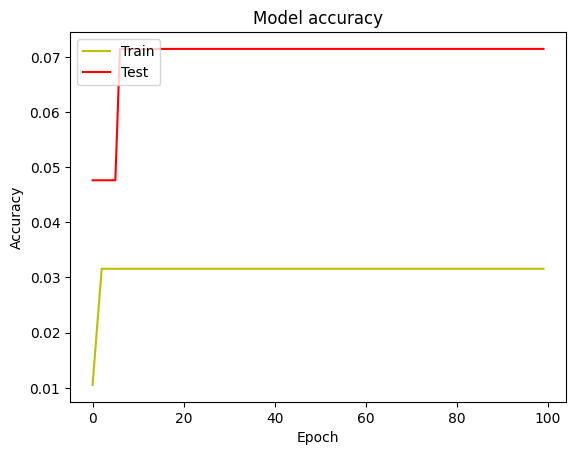

In [ ]:

plt.plot(history.history['acc'],'y')
plt.plot(history.history['val_acc'],'r')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

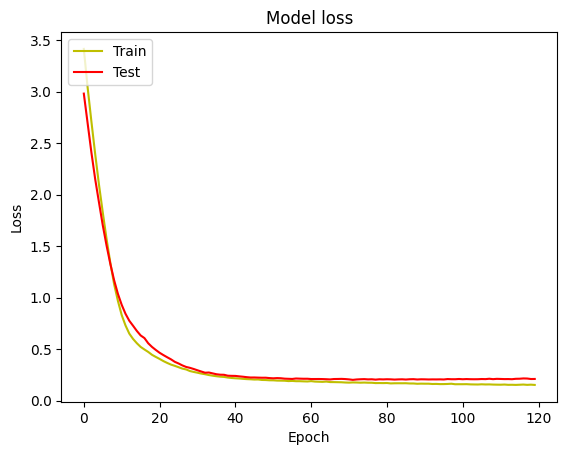

In [ ]:
plt.plot(history.history['loss'],'y')
plt.plot(history.history['val_loss'],'r')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1820 - acc: 0.0435


[0.18199607729911804, 0.043478261679410934]

In [ ]:
pred = model.predict(X_test)
result = pd.DataFrame(data={"예측" : pred.reshape(-1), "실제" : y_test})
result

2/2 [==============================] - 0s 5ms/step


,예측,실제
19,1.767292,1.451923
42,1.297040,1.908497
155,1.432500,2.277397
111,1.655098,1.675676
147,1.786614,2.010811
15,1.893734,2.031056
24,1.477825,1.574074
68,1.762675,1.137255
117,2.033379,1.852459
98,2.082180,1.424242


In [ ]:
a=sorted(pred.reshape(-1)-y_test)
np.array(a).mean()

0.052719948958286425

In [ ]:
a=sorted(pred.reshape(-1)-y_test)
a


[-0.8448976128594969,
 -0.7825767269174806,
 -0.6534302104417113,
 -0.6236781675349121,
 -0.6114568655525512,
 -0.5407190602589722,
 -0.49147356830468736,
 -0.28785918085253903,
 -0.2695581048079223,
 -0.2373487634813234,
 -0.22419663138879375,
 -0.19986763528417972,
 -0.1698056244995727,
 -0.16882602802563484,
 -0.16002931891052263,
 -0.1373218035192263,
 -0.09624926683294688,
 -0.08817664379254153,
 -0.07579550732434082,
 -0.07241511344909668,
 -0.07108748240783713,
 -0.03437724414514154,
 -0.020577714574218753,
 -0.01787257194519043,
 0.011473589584411581,
 0.033022840484435934,
 0.03349798935119619,
 0.07867959524621582,
 0.18091958507421868,
 0.2171393232191161,
 0.24697006796105958,
 0.2844096889536132,
 0.3002347577515869,
 0.3064738685195312,
 0.315368707286499,
 0.39831333160400395,
 0.43100151166162126,
 0.45256117076428226,
 0.5923035638020631,
 0.6177704334259033,
 0.6254202641300659,
 0.6579371223562012,
 0.6829980211103515,
 0.8348525050679931,
 0.9793795070128173,
 1.023

In [ ]:
df = pd.read_csv('/content/예측용 데이터.csv', encoding='cp949')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
new_inputs=df.drop(['Unnamed: 0','번호','구_x','행정동 code'],axis=1)

In [ ]:
new_inputs.rename(columns={'행정동_x':'행정동'}, inplace = True)

In [ ]:
final_numeric_col_df

,30~59세 인구,평균 버스 이용량 (명),수요,인프라,경제,비만도 분포,1~2인가구,3인 가구 이상,가구유형,value
0,-0.420011,-1.149063,-0.411074,0.246934,-0.834784,0.670746,-0.335298,-0.969002,0.815754,1.889423
1,-0.111183,-1.078695,-0.882510,-1.275187,-0.228235,-0.750018,-0.737575,-1.025622,-0.453468,1.995192
2,0.610444,-0.660385,0.768876,-0.637491,-0.850910,-0.450910,-0.830883,-0.944966,0.007145,1.606061
3,0.769360,0.050033,-0.538706,-0.329316,-0.160622,-0.151802,0.019152,0.156988,-0.156515,1.695652
4,-0.755762,0.232782,0.845636,1.331741,2.618061,-0.750018,1.477152,-0.206235,2.905859,1.520000
...,...,...,...,...,...,...,...,...,...,...
178,-0.755762,0.232782,0.845636,1.331741,2.618061,-0.750018,1.477152,-0.206235,2.905859,1.688172
179,-0.453020,-0.547589,-0.823618,-1.320428,-0.980431,1.044632,-0.551841,-0.281016,-0.153647,1.910569
180,-0.355726,-0.755901,-1.247170,-1.835241,-0.958755,1.044632,-1.283335,-1.122838,-0.315692,1.634146
181,2.964376,-0.350927,-0.034850,-0.204885,0.317118,0.147307,1.470110,0.128678,3.063276,1.864865


In [ ]:
final_numeric_col_df.columns

Index(['30~59세 인구', '평균 버스 이용량 (명)', '수요', '인프라', '경제', '비만도 분포', '1~2인가구',
       '3인 가구 이상', '가구유형', 'value'],
      dtype='object')

In [ ]:
unlabeled_data = np.array(new_inputs.drop('행정동', axis = 1))
unlabeled_data
predictions = model.predict(unlabeled_data)

9/9 [==============================] - 0s 2ms/step


In [ ]:
pred_dict={}
pred_list=list(predictions.reshape(-1))
pred_list
pred_dict['value']=pred_list

In [ ]:
pred_df=pd.DataFrame(pred_dict)
pred_df

,value
0,2.850996
1,3.667299
2,2.562894
3,2.576022
4,2.440018
...,...
272,1.805814
273,1.662607
274,1.458840
275,1.601550


In [ ]:
최종 = pd.concat([new_inputs['행정동'], pred_df], axis = 1)
최종

,행정동,value
0,청운효자동,2.850996
1,사직동,3.667299
2,삼청동,2.562894
3,부암동,2.576022
4,평창동,2.440018
...,...,...
272,암사2동,1.805814
273,천호2동,1.662607
274,천호3동,1.458840
275,성내2동,1.601550
